# HOUSE PRICE PREDICTION 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor





In [3]:
df  = pd.read_csv('C:/python/house-prices-advanced-regression-techniques/train.csv')

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.shape

(1460, 81)

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Pre-Processing

# Missing Value Analysis

In [8]:
df.isnull().sum() 

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

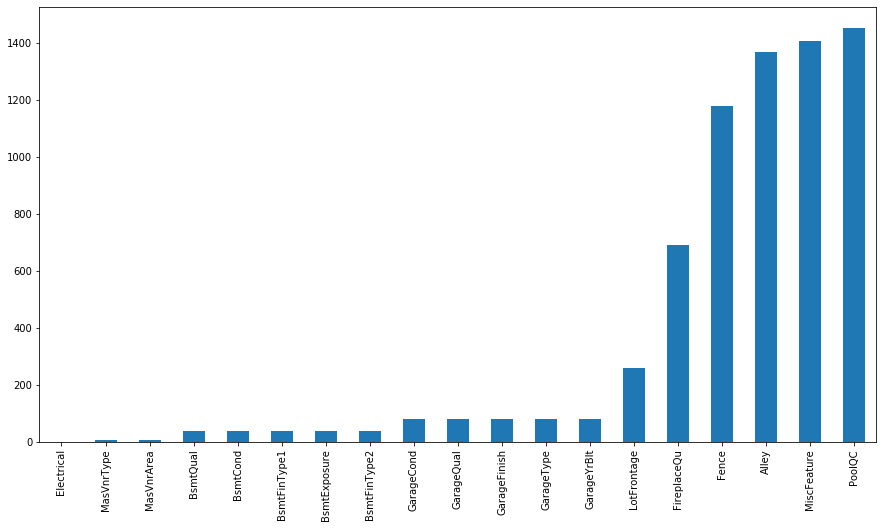

In [9]:
missing = df.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace = True)
plt.figure(figsize=(15,8))
missing.plot.bar()


In [11]:
missing_val = pd.DataFrame(df.isnull().sum())
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: "Missing-percentage"})
missing_val["Missing-percentage"] = (missing_val['Missing-percentage']/len(df))*100
missing_val = missing_val.sort_values('Missing-percentage', ascending = False).reset_index(drop = True)
missing_val.loc[missing_val['Missing-percentage']> 0]



,Variables,Missing-percentage
0,PoolQC,99.520548
1,MiscFeature,96.301370
2,Alley,93.767123
3,Fence,80.753425
4,FireplaceQu,47.260274
5,LotFrontage,17.739726
6,GarageYrBlt,5.547945
7,GarageCond,5.547945
8,GarageType,5.547945
9,GarageFinish,5.547945


In [12]:
df = df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','Id'], axis=1)     #remove variable whose missing value >30

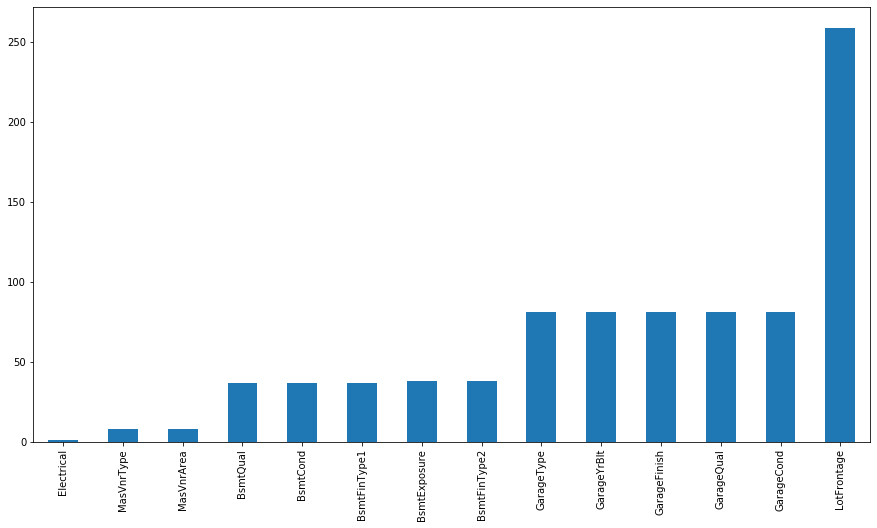

In [13]:
missing = df.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace = True)
plt.figure(figsize=(15,8))
missing.plot.bar()


In [14]:
missing_val = pd.DataFrame(df.isnull().sum())
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: "Missing-percentage"})
missing_val["Missing-percentage"] = (missing_val['Missing-percentage']/len(df))*100
missing_val = missing_val.sort_values('Missing-percentage', ascending = False).reset_index(drop = True)
missing_val.loc[missing_val['Missing-percentage']> 0]





,Variables,Missing-percentage
0,LotFrontage,17.739726
1,GarageType,5.547945
2,GarageYrBlt,5.547945
3,GarageFinish,5.547945
4,GarageQual,5.547945
5,GarageCond,5.547945
6,BsmtFinType2,2.602740
7,BsmtExposure,2.602740
8,BsmtQual,2.534247
9,BsmtCond,2.534247


In [15]:
df.info()                              #to see datatypes of all variable so that we can impute missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [16]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())        

#we selected mean method directly among mean, medain and  mode

In [17]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [19]:
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])




In [20]:
missing_val = pd.DataFrame(df.isnull().sum())
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: "Missing-percentage"})
missing_val["Missing-percentage"] = (missing_val['Missing-percentage']/len(df))*100
missing_val = missing_val.sort_values('Missing-percentage', ascending = False).reset_index(drop = True)
missing_val.loc[missing_val['Missing-percentage']> 0]
missing_val
                                            #no missing values now

,Variables,Missing-percentage
0,MSSubClass,0.0
1,GarageYrBlt,0.0
2,Fireplaces,0.0
3,Functional,0.0
4,TotRmsAbvGrd,0.0
...,...,...
70,MasVnrArea,0.0
71,MasVnrType,0.0
72,Exterior2nd,0.0
73,Exterior1st,0.0


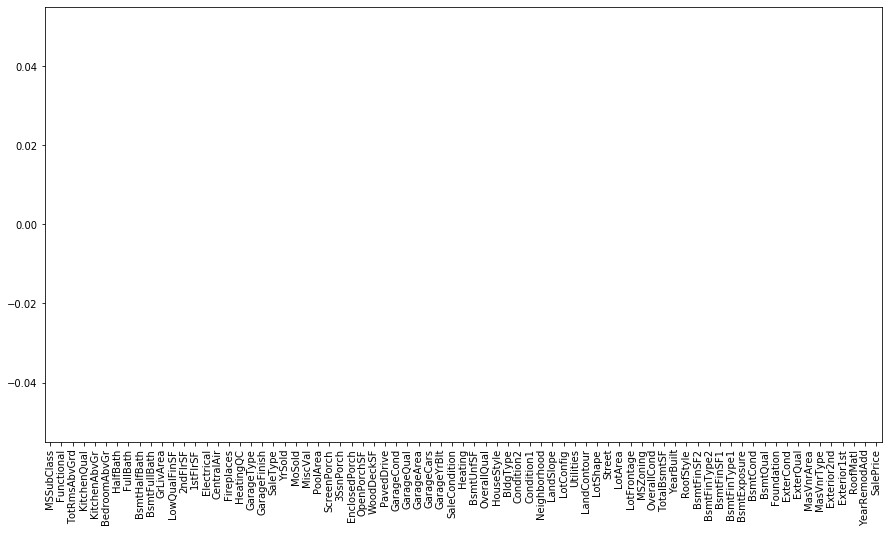

In [21]:
missing = df.isnull().sum()
missing.sort_values(inplace = True)
plt.figure(figsize=(15,8))
missing.plot.bar()                                   #no missing values now


In [22]:
df.info()                             #no missing values , all 1460 imputed 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

# Outliers Handling

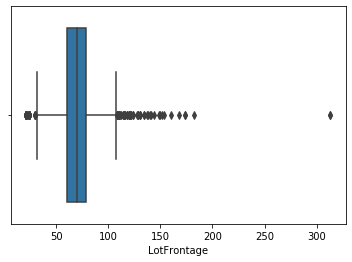

In [23]:
sns.boxplot(x = df['LotFrontage'])

{'whiskers': [<matplotlib.lines.Line2D at 0xa3e2270>,
 'caps': [<matplotlib.lines.Line2D at 0xa3e2750>,
 'boxes': [<matplotlib.lines.Line2D at 0xa3d4eb0>],
 'medians': [<matplotlib.lines.Line2D at 0xa3e2c70>],
 'fliers': [<matplotlib.lines.Line2D at 0xa3e2e90>],
 'means': []}

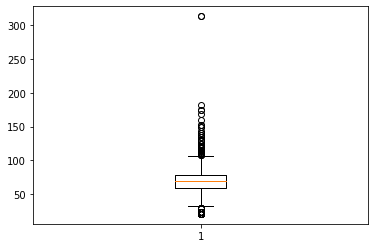

In [24]:
get_ipython().run_line_magic('matplotlib', 'inline')

plt.boxplot(df['LotFrontage'])                      #edwisor type , both are same like above

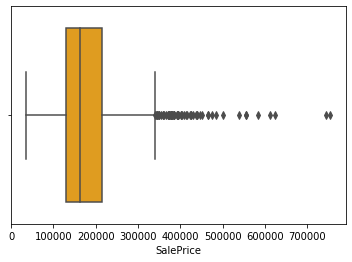

In [25]:
sns.boxplot(x = df['SalePrice'] , color= 'orange')

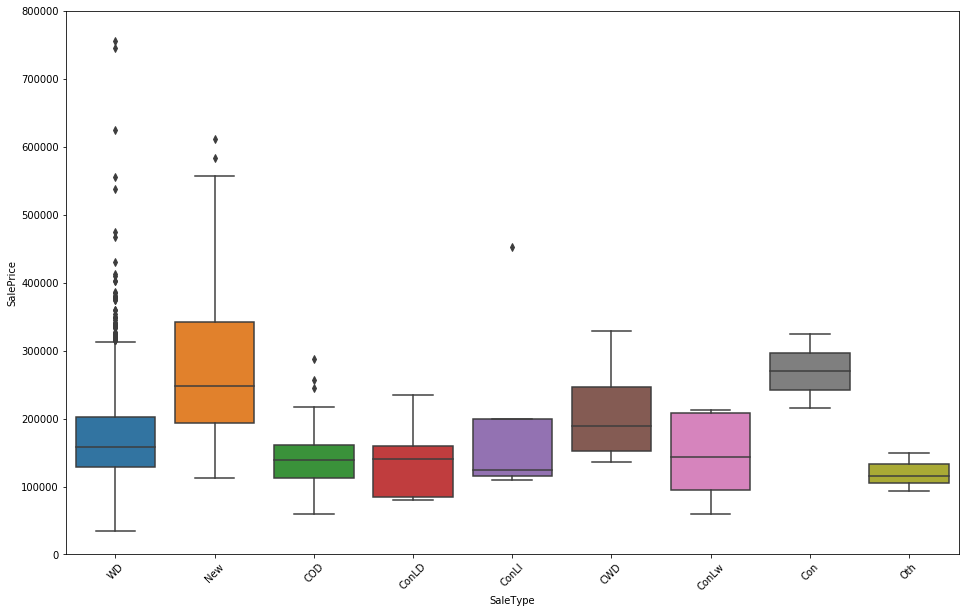

In [26]:
f , ax = plt.subplots(figsize =(16,10))
fig = sns.boxplot(x = 'SaleType',y='SalePrice', data =df)
fig.axis(ymin=0 ,ymax = 800000);
xt = plt.xticks(rotation = 45)

In [27]:
cnames = df.select_dtypes(include=np.number)


In [28]:
for i in cnames:
    print(i)
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    iqr = q75 - q25
    
    min = q25 - (iqr*3)
    max = q75 + (iqr*3)
    print(min)
    print(max)
 
    df = df.drop(df[df.loc[:,i] > max].index, axis =0)     #we did not remove data below lower fence as data is less



MSSubClass
-130.0
220.0
LotFrontage
3.0
136.0
LotArea
-4427.25
23403.0
OverallQual
-1.0
13.0
OverallCond
2.0
9.0
YearBuilt
1813.0
2142.0
YearRemodAdd
1856.0
2115.0
MasVnrArea
-492.0
656.0
BsmtFinSF1
-2085.0
2780.0
BsmtFinSF2
0.0
0.0
BsmtUnfSF
-1458.75
2575.0
TotalBsmtSF
-681.75
2729.0
1stFlrSF
-624.0
2848.0
2ndFlrSF
-2184.0
2912.0
LowQualFinSF
0.0
0.0
GrLivArea
-711.5
3579.5
BsmtFullBath
-3.0
4.0
BsmtHalfBath
0.0
0.0
FullBath
-2.0
5.0
HalfBath
-3.0
4.0
BedroomAbvGr
-1.0
6.0
KitchenAbvGr
1.0
1.0
TotRmsAbvGrd
-1.0
13.0
Fireplaces
-3.0
4.0
GarageYrBlt
1843.0
2123.0
GarageCars
-2.0
5.0
GarageArea
-419.0
1322.25
WoodDeckSF
-483.0
644.0
OpenPorchSF
-208.5
278.0
EnclosedPorch
0.0
0.0
3SsnPorch
0.0
0.0
ScreenPorch
0.0
0.0
PoolArea
0.0
0.0
MiscVal
0.0
0.0
MoSold
-4.0
17.0
YrSold
2001.0
2015.0
SalePrice
-136700.0
496100.0


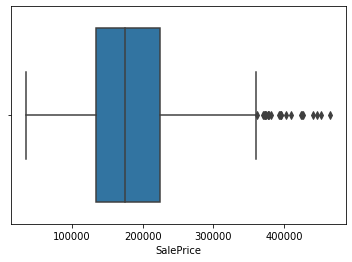

In [29]:
sns.boxplot(x = df['SalePrice'])

In [30]:
df.shape

(814, 75)

# Feature Selection

In [31]:
cnames = df.select_dtypes(include=np.number)


In [32]:
c_names = df.select_dtypes(include=np.object)


In [33]:
#Chisquare test of independence
    
    #loop for chi square values
for i in c_names:
        print(i)
        chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['SalePrice'], df[i]))
        print(p)

MSZoning
5.968384613552694e-16
Street
1.5957274460423928e-19
LotShape
0.003866984085065646
LandContour
0.047485251813992296
Utilities
1.0
LotConfig
0.01266417051307794
LandSlope
3.275503057258993e-08
Neighborhood
0.005810105931730954
Condition1
0.9999999999646376
Condition2
0.9999999999999701
BldgType
0.999999875396215
HouseStyle
5.3126251201428094e-08
RoofStyle
8.794262670911615e-34
RoofMatl
5.66577260491251e-23
Exterior1st
0.6217898444575451
Exterior2nd
0.9999918319586781
MasVnrType
7.64450966941031e-10
ExterQual
3.3262772295594343e-12
ExterCond
0.2329826466020047
Foundation
0.16305020466018716
BsmtQual
2.2707479489226474e-14
BsmtCond
7.146537246281839e-17
BsmtExposure
0.019108823024228394
BsmtFinType1
0.9950817005839877
BsmtFinType2
1.0
Heating
2.5651575695847616e-06
HeatingQC
0.05894784735273734
CentralAir
0.008179546246985515
Electrical
1.7766704491578266e-23
KitchenQual
3.52672039586267e-13
Functional
0.014309115489467552
GarageType
0.15604752388905543
GarageFinish
0.000120652632

In [34]:
cat_col_rem = ['LandContour','Utilities','LandSlope','Condition1','Condition2','BldgType','Exterior1st','Exterior2nd',
               'ExterCond','Foundation','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','Functional',
              'GarageType','GarageCond','PavedDrive','SaleCondition']

In [35]:
df = df.drop(cat_col_rem,axis = 1)

# Correlation - Heatmap

In [36]:
correlation = cnames.corr()
print(correlation['SalePrice'].sort_values(ascending = False),'\n')

SalePrice        1.000000
OverallQual      0.825125
GrLivArea        0.765128
GarageCars       0.713573
GarageArea       0.708352
TotalBsmtSF      0.656064
1stFlrSF         0.639488
FullBath         0.629659
TotRmsAbvGrd     0.628790
YearBuilt        0.575271
YearRemodAdd     0.552897
GarageYrBlt      0.544132
Fireplaces       0.465471
LotArea          0.420978
MasVnrArea       0.419830
LotFrontage      0.408755
OpenPorchSF      0.385296
WoodDeckSF       0.379197
BsmtFinSF1       0.346041
2ndFlrSF         0.298890
BedroomAbvGr     0.237062
HalfBath         0.236573
BsmtUnfSF        0.229766
BsmtFullBath     0.228967
MoSold           0.087417
YrSold          -0.012576
MSSubClass      -0.098230
OverallCond     -0.156382
BsmtFinSF2            NaN
LowQualFinSF          NaN
BsmtHalfBath          NaN
KitchenAbvGr          NaN
EnclosedPorch         NaN
3SsnPorch             NaN
ScreenPorch           NaN
PoolArea              NaN
MiscVal               NaN
Name: SalePrice, dtype: float64 



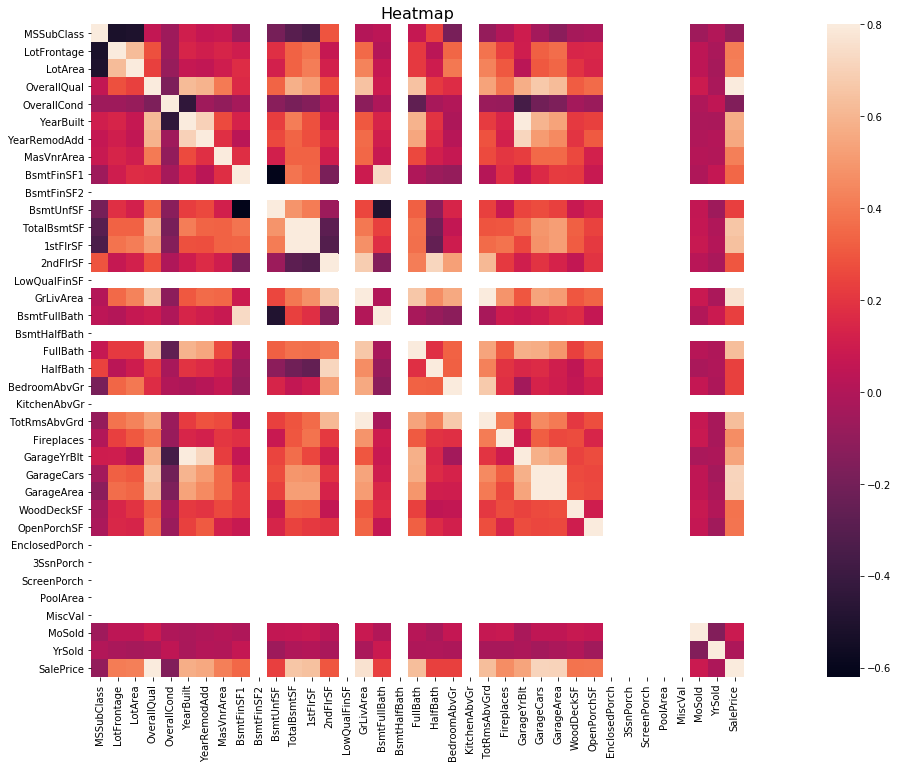

In [37]:
f , ax = plt.subplots(figsize = (30,12))
plt.title('Heatmap',y = 1 , size = 16)
sns.heatmap(correlation , square = True,vmax = 0.8)

In [40]:
cols_rem = ['LotFrontage','LotArea','MSSubClass','YearBuilt','BsmtUnfSF','GarageArea','LowQualFinSF','BsmtFinSF2',
           '2ndFlrSF','HalfBath','BedroomAbvGr','BsmtFullBath','MoSold','YrSold','OverallCond','BsmtHalfBath',
           'KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

In [41]:
df = df.drop(cols_rem,axis = 1)

# FEATURE SCALING

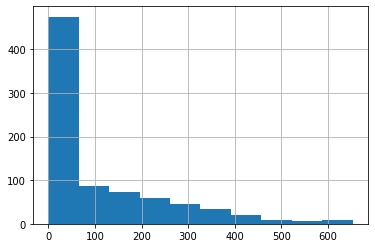

In [42]:
df['MasVnrArea'].hist()                         #not normally distributed

(array([  4.,   8.,  30.,  52.,  76., 116.,  81.,  93.,  89.,  56.,  59.,
         30.,  31.,  18.,  17.,  19.,   9.,   6.,   7.,   5.,   4.,   2.,
          2.]),
 array([ 35311.        ,  53993.13043478,  72675.26086957,  91357.39130435,
        110039.52173913, 128721.65217391, 147403.7826087 , 166085.91304348,
        184768.04347826, 203450.17391304, 222132.30434783, 240814.43478261,
        259496.56521739, 278178.69565217, 296860.82608696, 315542.95652174,
        334225.08695652, 352907.2173913 , 371589.34782609, 390271.47826087,
        408953.60869565, 427635.73913043, 446317.86956522, 465000.        ]),
 <a list of 23 Patch objects>)

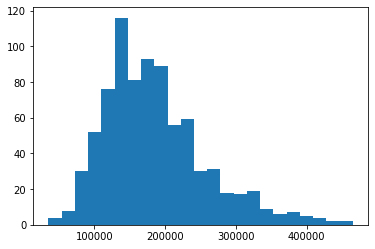

In [43]:
get_ipython().run_line_magic('matplotlib', 'inline')
plt.hist(df['SalePrice'], bins='auto')                             ##not normally distributed


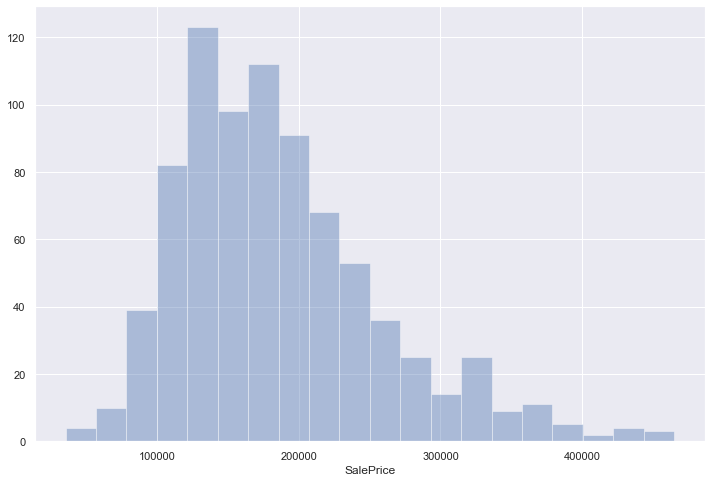

In [44]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.distplot(df['SalePrice'] , kde = False,bins = 20 );

In [45]:
cnames = df.select_dtypes(include=np.number)


In [46]:
cnames = cnames.drop(['SalePrice'], axis=1)


In [47]:
#normalisation
for i in cnames:
    print(i)
    df[i] = (df[i] - (df[i].min()))/((df[i].max()) - (df[i].min()))


OverallQual
YearRemodAdd
MasVnrArea
BsmtFinSF1
TotalBsmtSF
1stFlrSF
GrLivArea
FullBath
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
WoodDeckSF
OpenPorchSF


# MODEL DEVELOPMENT

In [49]:
#Assigning levels to the categories
lis = []
for i in range(0, df.shape[1]):
        #print(i)
        if(df.iloc[:,i].dtypes == 'object'):
            df.iloc[:,i] = pd.Categorical(df.iloc[:,i])
            #print(df[[i]])
            df.iloc[:,i] = df.iloc[:,i].cat.codes
            df.iloc[:,i] = df.iloc[:,i].astype('object')
            lis.append(df.columns[i])
            

In [51]:
df['MSZoning'].value_counts()

3    652
4     99
1     57
2      5
0      1
Name: MSZoning, dtype: int64

In [53]:
#MAPE function
def MAPE(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape


In [54]:
sample = np.random.rand(len(df)) < 0.8

train = df[sample]
test = df[~sample]


######## Linear Regression ###########

In [56]:
LR_model = sm.OLS(train.iloc[:,32], train.iloc[:,0:32].astype(float)).fit()


In [57]:
LR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     175.0
Date:                Fri, 17 Apr 2020   Prob (F-statistic):          6.54e-281
Time:                        13:26:58   Log-Likelihood:                -7389.4
No. Observations:                 644   AIC:                         1.484e+04
Df Residuals:                     612   BIC:                         1.499e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
MSZoning     -3742.0608   1772.776     -2.111      0.035   -7223.522    -260.599
Street        7.884e+04   2.05e+04      3.849      0.000    3.86e+04    1.19e+05
LotShape      -442.4907    714.340     -0.619      0.536   -1845.346     960.364
LotConfig    -1145.3220    638.992     -1.792      0.074   -2400.204     109.560
Neighborhood    93.0854    174.561      0.533      0.594    -249.726     435.897
HouseStyle   -1840.1681    879.937     -2.091      0.037   -3568.231    -112.105
OverallQual   7.884e+04   1.22e+04      6.438      0.000    5.48e+04    1.03e+05
YearRemodAdd  1.388e+04   4672.714      2.969      0.003    4698.692    2.31e+04
RoofStyle     1792.5822   1377.498      1.301      0.194    -912.615    4497.780
RoofMatl     -1.116e+04   6714.553     -1.663      0.097   -2.44e+04    2022.282
MasVnrType    3168.3081   1636.106      1.936      0.053     -44.755    6381.371
MasVnrArea    9665.2207   5311.168      1.820      0.069    -765.105    2.01e+04
ExterQual    -8157.8674   2434.236     -3.351      0.001   -1.29e+04   -3377.399
BsmtQual      -1.23e+04   1736.180     -7.083      0.000   -1.57e+04   -8886.993
BsmtCond      2009.6823   1726.738      1.164      0.245   -1381.368    5400.733
BsmtFinSF1    4.382e+04   4431.999      9.886      0.000    3.51e+04    5.25e+04
TotalBsmtSF   3.404e+04   1.34e+04      2.548      0.011    7803.334    6.03e+04
Heating      -1.128e+04   9822.145     -1.148      0.251   -3.06e+04    8010.408
Electrical    -650.2923   1176.251     -0.553      0.581   -2960.271    1659.686
1stFlrSF      1.806e+04   1.28e+04      1.415      0.158   -7002.137    4.31e+04
GrLivArea     1.728e+05   1.52e+04     11.380      0.000    1.43e+05    2.03e+05
FullBath     -1.163e+04   9254.489     -1.256      0.209   -2.98e+04    6548.001
KitchenQual  -5063.2490   1871.117     -2.706      0.007   -8737.839   -1388.659
TotRmsAbvGrd  1.866e+04   1.11e+04      1.674      0.095   -3227.807    4.06e+04
Fireplaces    8129.4821   5897.954      1.378      0.169   -3453.202    1.97e+04
GarageYrBlt   1277.3386   8181.856      0.156      0.876   -1.48e+04    1.73e+04
GarageFinish   593.1368   1592.935      0.372      0.710   -2535.146    3721.419
GarageCars    4.616e+04   8221.355      5.615      0.000       3e+04    6.23e+04
GarageQual    3236.0763   2214.512      1.461      0.144   -1112.889    7585.042
WoodDeckSF    8441.0489   5477.642      1.541      0.124   -2316.207    1.92e+04
OpenPorchSF   5835.6055   5374.576      1.086      0.278   -4719.243    1.64e+04
SaleType      -819.1514    669.033     -1.224      0.221   -2133.031     494.728
==============================================================================
Omnibus:                      132.142   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1020.944
Skew:      

In [58]:
predictions_LR = LR_model.predict(test.iloc[:,0:32])


In [59]:
Error_LR = MAPE(test.iloc[:,32], predictions_LR)

In [60]:
Error_LR

11.304437900129608

In [61]:
Accuracy_LR = 100 - Error_LR
Accuracy_LR


88.69556209987039

########### DECISION TREE #################

In [62]:
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:32],train.iloc[:,32])


In [63]:
predictions_DT = fit_DT.predict(test.iloc[:,0:32])


In [64]:
Error_DT = MAPE(test.iloc[:,32], predictions_DT)
Error_DT


20.118622153663406

In [66]:
Accuracy_DT = 100 - Error_DT
Accuracy_DT


79.88137784633659

############## RANDOM FOREST #################

In [71]:
RF_model = RandomForestRegressor(n_estimators = 500 ).fit(train.iloc[:,0:32],train.iloc[:,32])

In [72]:
RF_predictions = RF_model.predict(test.iloc[:,0:32])

In [73]:
Error_RF = MAPE(test.iloc[:,32], RF_predictions)
Error_RF

10.125237209945423

In [74]:
Accuracy_RF = 100 - Error_RF
Accuracy_RF

89.87476279005458

Here, Random Forest is performing well so, We will freeze Random Forest.




# Prediction on Test Dataset :~














In [75]:
price  = pd.read_csv('C:/python/house-prices-advanced-regression-techniques/test.csv')

In [76]:
price

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [77]:
price.shape

(1459, 80)

In [78]:
price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


# Data Pre-Processing

# Missing Value Analysis

In [79]:
price.isnull().sum() 

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [80]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

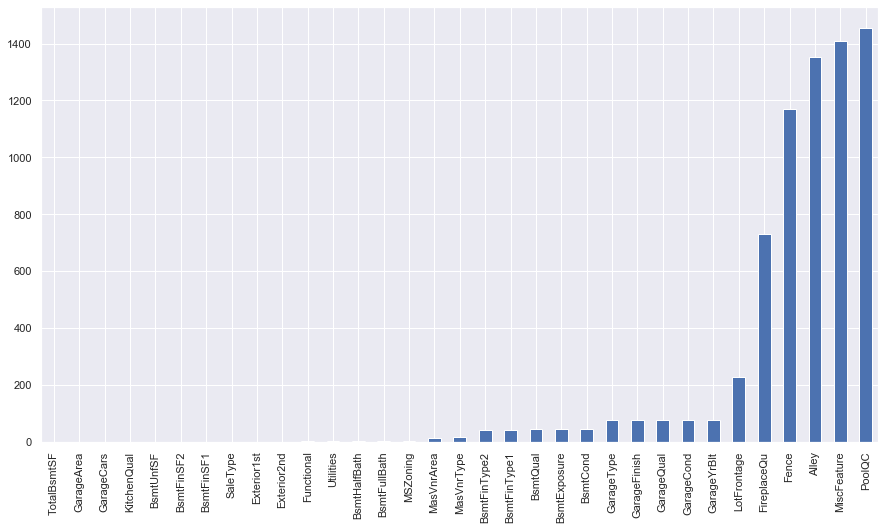

In [81]:
missing = price.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace = True)
plt.figure(figsize=(15,8))
missing.plot.bar()


In [82]:
missing_val = pd.DataFrame(price.isnull().sum())
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: "Missing-percentage"})
missing_val["Missing-percentage"] = (missing_val['Missing-percentage']/len(price))*100
missing_val = missing_val.sort_values('Missing-percentage', ascending = False).reset_index(drop = True)
missing_val.loc[missing_val['Missing-percentage']> 0]



,Variables,Missing-percentage
0,PoolQC,99.794380
1,MiscFeature,96.504455
2,Alley,92.666210
3,Fence,80.123372
4,FireplaceQu,50.034270
5,LotFrontage,15.558602
6,GarageYrBlt,5.346127
7,GarageQual,5.346127
8,GarageFinish,5.346127
9,GarageCond,5.346127


In [83]:
price = price.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu',
                    'Id'], axis=1)     #remove variable whose missing value >30

In [84]:
missing_val = pd.DataFrame(price.isnull().sum())
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: "Missing-percentage"})
missing_val["Missing-percentage"] = (missing_val['Missing-percentage']/len(price))*100
missing_val = missing_val.sort_values('Missing-percentage', ascending = False).reset_index(drop = True)
missing_val.loc[missing_val['Missing-percentage']> 0]

,Variables,Missing-percentage
0,LotFrontage,15.558602
1,GarageCond,5.346127
2,GarageYrBlt,5.346127
3,GarageFinish,5.346127
4,GarageQual,5.346127
5,GarageType,5.209047
6,BsmtCond,3.084304
7,BsmtExposure,3.015764
8,BsmtQual,3.015764
9,BsmtFinType1,2.878684


In [85]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [86]:
price['LotFrontage'] = price['LotFrontage'].fillna(price['LotFrontage'].mean())
price['GarageYrBlt'] = price['GarageYrBlt'].fillna(price['GarageYrBlt'].mean())
price['MasVnrArea'] = price['MasVnrArea'].fillna(price['MasVnrArea'].mean())
price['BsmtHalfBath'] = price['BsmtHalfBath'].fillna(price['BsmtHalfBath'].mean())
price['BsmtFullBath'] = price['BsmtFullBath'].fillna(price['BsmtFullBath'].mean())
price['BsmtFinSF1'] = price['BsmtFinSF1'].fillna(price['BsmtFinSF1'].mean())
price['BsmtFinSF2'] = price['BsmtFinSF2'].fillna(price['BsmtFinSF2'].mean())
price['BsmtUnfSF'] = price['BsmtUnfSF'].fillna(price['BsmtUnfSF'].mean())
price['TotalBsmtSF'] = price['TotalBsmtSF'].fillna(price['TotalBsmtSF'].mean())
price['GarageArea'] = price['GarageArea'].fillna(price['GarageArea'].mean())
price['GarageCars'] = price['GarageCars'].fillna(price['GarageCars'].mean())






In [87]:
price['GarageFinish'] = price['GarageFinish'].fillna(price['GarageFinish'].mode()[0])
price['GarageQual'] = price['GarageQual'].fillna(price['GarageQual'].mode()[0])
price['GarageCond'] = price['GarageCond'].fillna(price['GarageCond'].mode()[0])
price['GarageType'] = price['GarageType'].fillna(price['GarageType'].mode()[0])
price['BsmtCond'] = price['BsmtCond'].fillna(price['BsmtCond'].mode()[0])
price['BsmtExposure'] = price['BsmtExposure'].fillna(price['BsmtExposure'].mode()[0])
price['BsmtQual'] = price['BsmtQual'].fillna(price['BsmtQual'].mode()[0])
price['BsmtFinType1'] = price['BsmtFinType1'].fillna(price['BsmtFinType1'].mode()[0])
price['BsmtFinType2'] = price['BsmtFinType2'].fillna(price['BsmtFinType2'].mode()[0])
price['MasVnrType'] = price['MasVnrType'].fillna(price['MasVnrType'].mode()[0])
price['MSZoning'] = price['MSZoning'].fillna(price['MSZoning'].mode()[0])
price['Utilities'] = price['Utilities'].fillna(price['Utilities'].mode()[0])
price['Functional'] = price['Functional'].fillna(price['Functional'].mode()[0])
price['Exterior2nd'] = price['Exterior2nd'].fillna(price['Exterior2nd'].mode()[0])
price['KitchenQual'] = price['KitchenQual'].fillna(price['KitchenQual'].mode()[0])
price['Exterior1st'] = price['Exterior1st'].fillna(price['Exterior1st'].mode()[0])
price['SaleType'] = price['SaleType'].fillna(price['SaleType'].mode()[0])




In [88]:
missing_val = pd.DataFrame(price.isnull().sum())
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: "Missing-percentage"})
missing_val["Missing-percentage"] = (missing_val['Missing-percentage']/len(price))*100
missing_val = missing_val.sort_values('Missing-percentage', ascending = False).reset_index(drop = True)
missing_val.loc[missing_val['Missing-percentage']> 0]
missing_val
                                            #no missing values now

,Variables,Missing-percentage
0,MSSubClass,0.0
1,GarageType,0.0
2,Functional,0.0
3,TotRmsAbvGrd,0.0
4,KitchenQual,0.0
...,...,...
69,MasVnrArea,0.0
70,MasVnrType,0.0
71,Exterior2nd,0.0
72,Exterior1st,0.0


# FEATURE SCALING

In [92]:
cnames_price= price.select_dtypes(include=np.number)


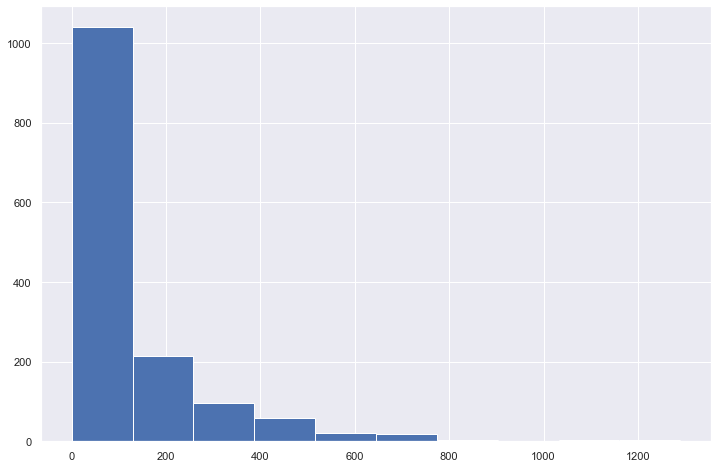

In [93]:
price['MasVnrArea'].hist()                         #not normally distributed

In [94]:
#normalisation
for i in cnames_price:
    print(i)
    price[i] = (price[i] - (price[i].min()))/((price[i].max()) - (price[i].min()))


MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold


In [95]:
price

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.000000,2,0.329609,0.184147,1,3,3,0,4,0,...,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.454545,1.0,8,4
1,0.000000,3,0.335196,0.232124,1,0,3,0,0,0,...,0.048518,0.0,0.0,0.000000,0.0,0.735294,0.454545,1.0,8,4
2,0.235294,3,0.296089,0.224197,1,0,3,0,4,0,...,0.045822,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0,8,4
3,0.235294,3,0.318436,0.154326,1,0,3,0,4,0,...,0.048518,0.0,0.0,0.000000,0.0,0.000000,0.454545,1.0,8,4
4,0.588235,3,0.122905,0.064121,1,0,1,0,4,0,...,0.110512,0.0,0.0,0.250000,0.0,0.000000,0.000000,1.0,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.823529,4,0.000000,0.008453,1,3,3,0,4,0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.454545,0.0,8,4
1455,0.823529,4,0.000000,0.007691,1,3,3,0,4,0,...,0.032345,0.0,0.0,0.000000,0.0,0.000000,0.272727,0.0,8,0
1456,0.000000,3,0.776536,0.336115,1,3,3,0,4,0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.727273,0.0,8,0
1457,0.382353,3,0.229050,0.162724,1,3,3,0,4,0,...,0.043127,0.0,0.0,0.000000,0.0,0.041176,0.545455,0.0,8,4


Here, we need to select those variable on which we developed a model so, we removed those variable in price dataset too

In [99]:
cat_col_rem_price = ['LandContour','Utilities','LandSlope','Condition1','Condition2','BldgType','Exterior1st','Exterior2nd',
               'ExterCond','Foundation','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','Functional',
              'GarageType','GarageCond','PavedDrive','SaleCondition']

In [100]:
price = price.drop(cat_col_rem_price,axis = 1)

In [101]:
cols_rem_price = ['LotFrontage','LotArea','MSSubClass','YearBuilt','BsmtUnfSF','GarageArea','LowQualFinSF','BsmtFinSF2',
           '2ndFlrSF','HalfBath','BedroomAbvGr','BsmtFullBath','MoSold','YrSold','OverallCond','BsmtHalfBath',
           'KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

In [102]:
price = price.drop(cols_rem_price,axis = 1)

# MODEL DEVELOPMENT

In [89]:
#Assigning levels to the categories
lis = []
for i in range(0, price.shape[1]):
        #print(i)
        if(price.iloc[:,i].dtypes == 'object'):
            price.iloc[:,i] = pd.Categorical(price.iloc[:,i])
            #print(price[[i]])
            price.iloc[:,i] = price.iloc[:,i].cat.codes
            price.iloc[:,i] = price.iloc[:,i].astype('object')
            lis.append(price.columns[i])                                #to covert categories into numbers
            

In [90]:
price['MSZoning'].value_counts()

3    1118
4     242
1      74
0      15
2      10
Name: MSZoning, dtype: int64

In [123]:
price['MSZoning'].value_counts()

3    619
4    100
1     63
2      5
0      4
Name: MSZoning, dtype: int64

Run MOdel on Test Data to Predict its price

In [104]:
predictions_price = RF_model.predict(price)


Importing test data to columnbind final results

In [107]:
price_id = pd.read_csv('C:/python/house-prices-advanced-regression-techniques/test.csv')


In [112]:
predictions_price = pd.DataFrame(predictions_price)

In [125]:
final_price = pd.concat([price_id['Id'], predictions_price], axis=1, ignore_index=True)


In [127]:
final_price

,0,1
0,1461,95632.876000
1,1462,103455.720000
2,1463,116760.048000
3,1464,114401.274000
4,1465,183871.340000
...,...,...
1454,2915,84199.406000
1455,2916,84798.206000
1456,2917,115313.833333
1457,2918,97023.350000


In [128]:
final_price.columns = ['Id','SalePrice']

In [129]:
final_price

,Id,SalePrice
0,1461,95632.876000
1,1462,103455.720000
2,1463,116760.048000
3,1464,114401.274000
4,1465,183871.340000
...,...,...
1454,2915,84199.406000
1455,2916,84798.206000
1456,2917,115313.833333
1457,2918,97023.350000


In [130]:
final_price.to_excel("Final Price.xlsx", index = False)
